## Match Candidates to Business Areas##

### Introduction ###

The aim of this RFC is to predict in which area within an Oil & Gas company will a candidate fit (Corporate or Business) based on her/his preferred ways of working. The qe¡uestion that is trying to answer is:

_Can we predict accurately in more tan 2/3 of the cases where a candidate will have the best cultural fit within the Company (corporate or business) as the first step of the hiring process?_

There are only two options that can be broadly described (without entering into the specific background of the candidate) based on the preferred ways of working. The outcome variable (called Section in the survey) has only two possible outcomes:

  - Corporate: Traditional support functions such as finance, HR, marketing, communications.
  - Business: Business units in downstream or midstream that can be typically found in an Oil & Gas company.

This is a real experiment for which a survey has been designed and sent out to more than 500 staff members based only in Spain. In this survey, 30 questions have been asked about their preferred ways of working (WoW or wow). The staff was given a month to complete the survey, closing the window to receive more surveys after that time. The threshold to start the analysis was either receiving 90% of the surveys or the duration of one month. The first one to happen.

The wow used that will act as predictors for the classification are:

  - Gender
  - Catalyst
  - Orderer
  - Influencer
  - Benefactor
  - Harmonizer
  - Investigator
  - Quantifier
  - Distiller
  - Innovator
  - Creator

To answer the survey a likert scale from 1-5 (less-high) has been given.

The 30 questions have been grouped by 10 different aspects of the personality adding the result of the 3 questions under each. Additionally, they have been asked to submit if they are part of the corporate or the business within the company (labelled data).

From the results obtained, two analysis have been carried out:
  - The first one based on the 10 "umbrella" ways of working.
  - The second one based on the 30 answers received by each individual.

For the purpose of this exercise, only the first option (10 umbrella wow) will be included in this notebook.

In [110]:
#Import Python libraries that will be used in this model
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing, decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model.stochastic_gradient import SGDClassifier
import time

In [2]:
# Read and import data
wow_raw = pd.read_csv('WOWanalysis.csv', encoding='latin-1')
wow_raw.head()

,StartDate,Progress,Duration (in seconds),Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
0,Start Date,Progress,Duration (in seconds),Catalyst-Driving,Catalyst-Orchestrating,Catalyst-Activating,Orderer-Ordering,Orderer-Risk Reducing,Orderer-Policing,Influencer-Communicating,...,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
1,02/01/2018 19:40,100,101,4,4,3,4,4,4,3,...,11,12,11,11,11,12,10,11,11,14
2,02/01/2018 19:39,100,190,5,5,1,4,2,1,3,...,11,7,6,15,13,10,5,9,13,5
3,02/01/2018 19:39,100,176,4,4,3,4,4,1,4,...,11,9,11,6,7,13,15,13,13,11
4,02/01/2018 19:40,100,205,5,4,5,1,2,4,4,...,14,7,12,11,12,8,4,7,13,14


The dataset that contains the results from the surveys have additional information that will not be required for the analysis. Let´s visualize the 56 columns of the dataset

In [3]:
#Identify all the columns in the file
wow_raw.columns

Index(['StartDate', 'Progress', 'Duration (in seconds)', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'SC0', 'SC1', 'SC2', 'SC3',
       'SC4', 'SC5', 'SC6', 'SC7', 'SC8', 'SC9', 'Section', 'Gender',
       'Identification', 'Catalyst_Score', 'Orderer_Score', 'Influencer_Score',
       'Benefactor_Score', 'Harmonizer_Score', 'Investigator_Score',
       'Quantifier_Score', 'Distiller_Score', 'Innovator_Score',
       'Creator_Score'],
      dtype='object')

Columns that are not ending in _Score hold raw data that will not be used in this analysis. Before cleansing the datset lets analyse the type of data it contains and the number of NaN or nulls it contains

In [4]:
#Analyse types of variables.length fo the dataset, number of null datapoints
wow_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 56 columns):
StartDate                469 non-null object
Progress                 469 non-null object
Duration (in seconds)    469 non-null object
Q2                       469 non-null object
Q3                       469 non-null object
Q4                       469 non-null object
Q5                       469 non-null object
Q6                       469 non-null object
Q7                       469 non-null object
Q8                       469 non-null object
Q9                       469 non-null object
Q10                      469 non-null object
Q11                      469 non-null object
Q12                      469 non-null object
Q13                      469 non-null object
Q14                      469 non-null object
Q15                      469 non-null object
Q16                      469 non-null object
Q17                      469 non-null object
Q18                      469 non-null ob

There are only two null objects in the dataset and the information is stored as objects although it is numerical. Columns that are not relevant for the analysis will be dropped. For the purpose of the experiment, information related to the date in which the test was answered, progress, duration and id of the respondents have been sanitized (in the case of the id) and dropped. Lets also inspect the unique values contained in the output variable since additional information (as year repondents were hired) was asked in the survey.

In [5]:
#Drop columns that are not relevant for the model
#Drop columns that have null-object (identification only)
wow_useful = wow_raw.drop(['StartDate', 'Progress', 'Duration (in seconds)', 'Identification'], axis = 1)

In [6]:
#Identify unique values in the Section Area
wow_useful.Section.unique()

array(['Section', 'CORP-01', 'BUSI-01', 'BUSI-02', 'CORP-2015', 'CORP-02',
       'CORP-2016', 'CORP-2017', 'BUSI-2017', 'BUSI-2016', 'CORP-2014'], dtype=object)

Although it is a binary classification and only two options are given, the information regarding the year respondents were hired has been introduced in different formats, making it useless for the analysis. Additionaly, the first row of each column contains the real name of the column.
The first row will be used to name the columns and then dropped to avoid repetition. Afterwards columns will be called to understand the real information they contain.

In [7]:
#Clean data and rename columns with row 0 from the original data set
wow_useful = wow_useful.rename(columns=wow_raw.iloc[0])

#Drop row 1 to avoid repetition and reset index
wow_useful = wow_useful.drop(wow_raw.index[0:3]).reset_index(drop=True)

In [8]:
#Identify all the columns in the file
wow_useful.columns

Index(['Catalyst-Driving', 'Catalyst-Orchestrating', 'Catalyst-Activating',
       'Orderer-Ordering', 'Orderer-Risk Reducing', 'Orderer-Policing',
       'Influencer-Communicating', 'Influencer-Advocating',
       'Influencer-Selling', 'Benefactor-Defending', 'Benefactor-Empathizing',
       'Benefactor-Developing', 'Harmonizer-Including',
       'Harmonizer-Conflict Reducing', 'Harmonizer-Consensus Building',
       'Investigator-Drilling', 'Investigator-Dissecting',
       'Investigator-Explaining', 'Quantifier-Measuring',
       'Quantifier-Pattern Finding', 'Quantifier-Modeling',
       'Distiler-Packaging', 'Distiler-Simplifying', 'Distiller-Connecting',
       'Innovator-Disrupting', 'Innovator-Brainstorming', 'Innovator-Testing',
       'Creator-Creating', 'Creator-Making', 'Creator-Expressing', 'Catalyst',
       'Orderer', 'Influencer', 'Benefactor', 'Harmonizer', 'Investigator',
       'Quantifier', 'Distiller', 'Innovator', 'Creator', 'Section', 'Gender',
       'Catalyst_S

From initial inspection of the columns, only the ones that store the scores of each way of working is interesting to be used as predictors. Hence, the rest of the columns will be dropped. Only Section, gender and all columns ending in _score will be kept in the new dataframe.

In [9]:
#Keep only the columns that end in -score
#Columns that end with "-score" are the addition of the ones that have the same name. For example: 
#Benefactor_Score = Benefactor-Defending + Benefactor-Empathizing + Benefactor-Developing
wow_scores = wow_useful[['Section','Gender','Catalyst_Score', 'Orderer_Score', 'Influencer_Score',
       'Benefactor_Score', 'Harmonizer_Score', 'Investigator_Score',
       'Quantifier_Score', 'Distiller_Score', 'Innovator_Score',
       'Creator_Score']]

#Show new dataframe
wow_scores.head()

,Section,Gender,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
0,BUSI-01,Hombre,11,9,11,6,7,13,15,13,13,11
1,CORP-01,Mujer,14,7,12,11,12,8,4,7,13,14
2,BUSI-02,Female,13,11,9,14,15,12,8,11,11,10
3,CORP-01,Mujer,7,10,11,14,13,8,10,9,8,7
4,BUSI-01,Male,10,7,11,12,11,9,9,9,12,9


Information regarding gender and Section (company´s area) has to be cleaned. Gender is stored in English and Spanih and Section stores the first four letter od the company´s area folled by the year. 
  
  - Gender will be mapped to 0 for female and 1 for male
  - Section will be mapped to CORP for Corporate and Business for BUS.

In [10]:
#Clean the "Gender" column
#Assign values to Gender: Male = 0, Hombre = 0, Mujer = 1, Female = 1
wow_scores['Gender'] = wow_scores.loc[:, 'Gender'].map({'Female': 1,'Mujer': 1, 'Male': 0,'Hombre': 0 })

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#Section column contains the cohort of people and the year they were interviewed.
#Not all of them keep the same format so map Sections to areas (i.e.  & MBD = MBD) to two unique values:
#CORP = Corporate Functions, BUS = Business 
wow_scores['Section'] = wow_scores.loc[:, 'Section'].map({'CORP-01': 'CORP',
                                                      'CORP-2015': 'CORP',
                                                      'CORP-02': 'CORP',
                                                      'CORP-2016': 'CORP',
                                                      'CORP-2017': 'CORP',
                                                      'CORP-2014': 'CORP',
                                                      'BUSI-01': 'BUS',
                                                      'BUSI-02': 'BUS',
                                                      'BUSI-2017': 'BUS',
                                                      'BUSI-2016': 'BUS'})                                    

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


To have a better understanding of the answers that have been received, a basic analysis of the responses by gender and copany´s area will be carried out. This will help to see if the outcome variable "Section" is imbalanced and the demographics of the company.

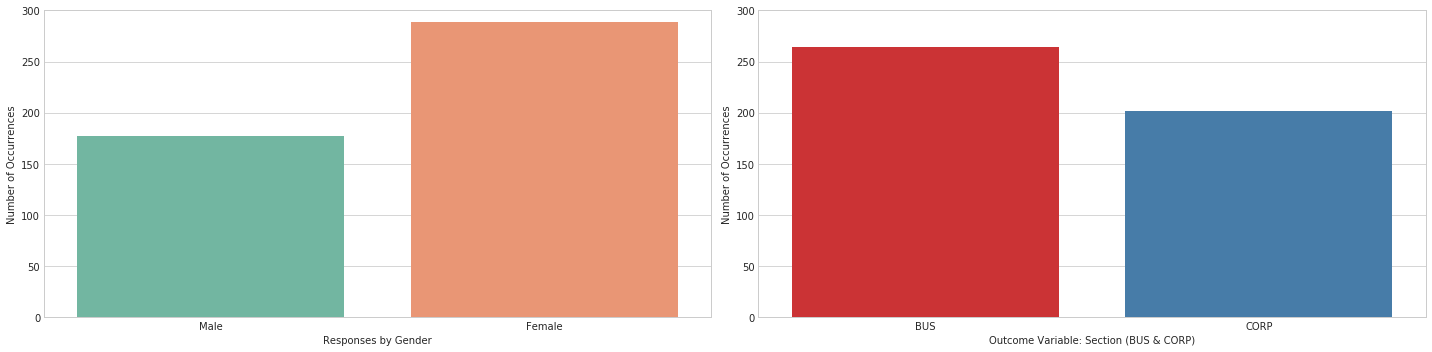

In [12]:
#Visualize the number of answers by Gender and by Category
#Check the outcome variable and see if there is any imbalance

plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
ax = sns.countplot(x="Gender", data=wow_scores, palette="Set2")
ax.set_xlabel('Responses by Gender')
ax.set_ylabel('Number of Occurrences')
ax.set_xticklabels(['Male','Female'], fontsize=10)
plt.ylim(0, 300)

plt.subplot(1, 2, 2)
ax = sns.countplot(x="Section", data=wow_scores, palette="Set1")
ax.set_xlabel('Outcome Variable: Section (BUS & CORP)')
ax.set_ylabel('Number of Occurrences')
plt.ylim(0, 300)

plt.tight_layout()
plt.show()

In the process of international expansion naturally the corporate part of the business is slightly lower than the business side. In this specific case, 43% is the corporate side of the company while 57% is the business side. This is aligned with the activity that this company is carrying out in Spain at the moment and the future plans it has.

Furthermore, from the exploratory analysis, there is a gender imbalance 62% women against 38% men.

To avoid the outcome variable (Section) imbalance when creating the classifier, the dataset has been resampled and the minority has been up-sampled. Before doing so, datapoints need to be changed from objects to floats. To analyze the socres, a new dataframe is built containing only the scores (predictors) of each wow.

In [13]:
#Build a new dataframe that contains the ratings obtained per category, dropping section and gender
#Drop Section & Gender
wow_scores_only = wow_scores.drop(['Section','Gender'],axis = 1)

#Create new dataframe only with ratings
wow_scores_only = wow_scores_only.astype(np.float64)

#Check the new dataframe
wow_scores_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 10 columns):
Catalyst_Score        466 non-null float64
Orderer_Score         466 non-null float64
Influencer_Score      466 non-null float64
Benefactor_Score      466 non-null float64
Harmonizer_Score      466 non-null float64
Investigator_Score    466 non-null float64
Quantifier_Score      466 non-null float64
Distiller_Score       466 non-null float64
Innovator_Score       466 non-null float64
Creator_Score         466 non-null float64
dtypes: float64(10)
memory usage: 36.5 KB


Exploratory analysis of the data to understand the distribution of the different wow scores (predictors) and the realtionship between them is carried out plotting joint relationships and histograms for univariate distributions. Furthermore regression curves are included to show the correlation that might exist between scores.

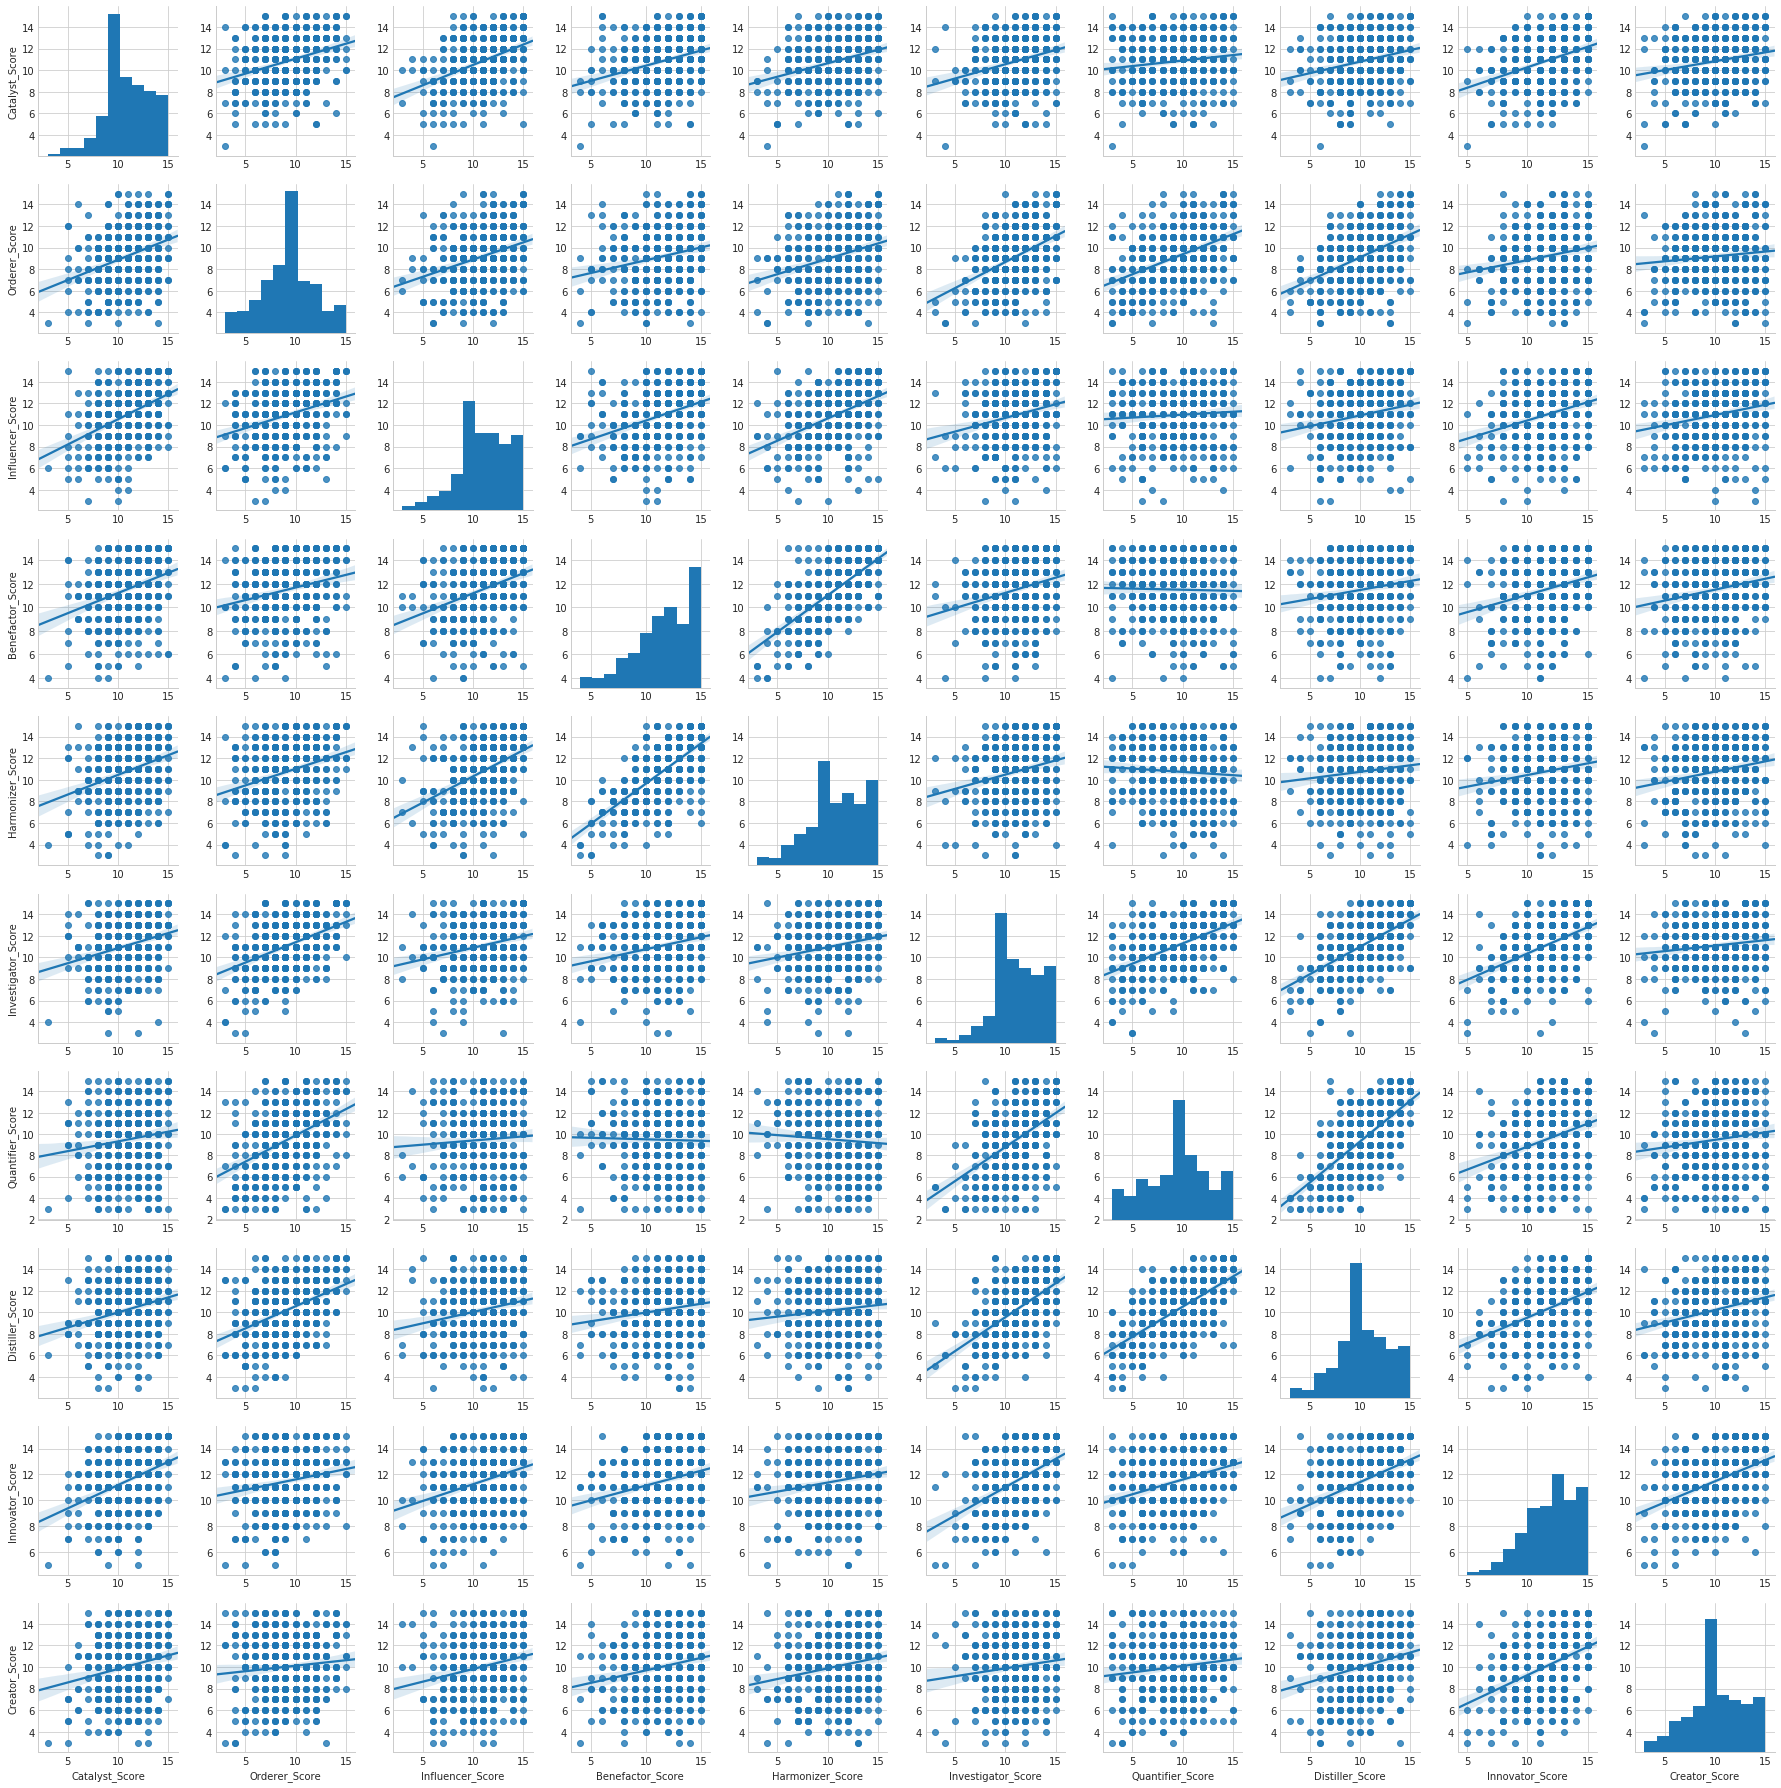

In [111]:
#Plot the distribution of the different ways of working (wow)
g = sns.pairplot(wow_scores_only, kind="reg")

None of the variables follow a normal distribution. This could be due to the small number of responses (only 466 datapoints). In all cases, except for the "benefactor_score" and the "innovator_score", the values obtained for the wow gravitate around 10, hence respondents are moved into the upper part of the likert scale (3 or more) as three questions are added per each of the wow represented in this project.

From a joint relationship standpoint we can see that are severl variables that show a high positive correlation such as "Investigator_score" and "Innovator_score", "Quantifier_Score" and "Investigator_Score" and "Distiller_Score" and "Investigator_Score". Further analysis through a correlation matrix is needed to confirm the high positiv correlation that has been initially seen between the varaibles.
As a first step a summary of the main statistics of the sample is obtained:

In [15]:
#Describe the data using statistics
wow_scores_only.describe()

,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,10.834764,9.184549,10.931330,11.508584,10.772532,11.083691,9.465665,10.210300,11.487124,10.036481
std,2.250102,2.615968,2.505822,2.492339,2.722226,2.312070,3.016781,2.568373,2.189134,2.780261
min,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000
25%,9.000000,7.000000,9.000000,10.000000,9.000000,9.000000,7.000000,8.000000,10.000000,8.000000
50%,11.000000,9.000000,11.000000,12.000000,11.000000,11.000000,10.000000,10.000000,12.000000,10.000000
75%,13.000000,11.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,12.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


Distributions are in all cases centered round the mean with the mean and the median being very much alike. The first quartile appears to be between 7 and 9 which validates that respondents are centered towards 3 in each individual question (3 questions per wow). The third quartile is between 11 and 13, being the maximum value that can be obtained 15. There are no outliers for any of the variables (under the criteria of 1.5 times the interquartile range).

To avoid the 3-15 scale in place, data is scaled following a Standard Normal Distribution N(0,1):

In [16]:
#Preproces the ratings
names = wow_scores_only.columns
scaled_scores_only = pd.DataFrame(preprocessing.scale(wow_scores_only), columns = names)

To have a better unerstanding of the correlation between variables, a heatmap has been produced. This allows to check if the variables that have been discovered earlier to have a high positive correlation are further investigated.

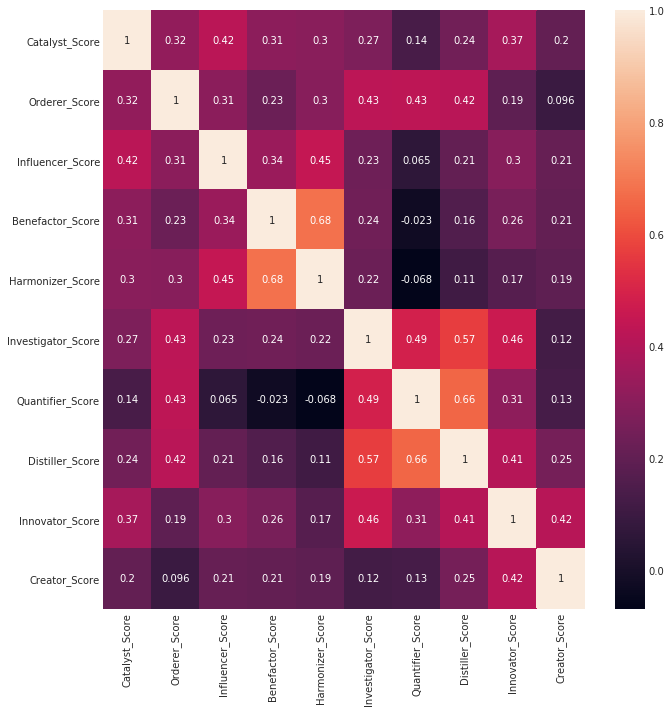

In [17]:
#Prepare heatmap to visually inspect the correlation between scores
#Build the correlation matrix between scores
correlation_mat = scaled_scores_only.corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_mat, annot=True)
plt.tight_layout()
plt.show()

The correlations between the scores of 10 ways of working have been analyzed being in the range 0.2 and 0.68 with two exceptions that are close to zero. As it was discovered when the joint relationship was plotted, the following variables show a high correlation (all of them higher than 50%):

  - Harmonizer/benefactor
  - Investigator/quantifier/distiller

To the dataframe containing the wow scores, gender and section are added once the socres are pre-processed.

In [19]:
#Incorporate the Section and Gender column to the dataset

#Build the secgen (section/gender) dataframe to be merged with the ratings dataframe
section_gender = wow_scores[['Section','Gender']]

#Build the new dataframe that incorporates the processed scores, section and gender
scaled_wow_scores = pd.concat([section_gender, scaled_scores_only],axis=1)

#Substitute the categorical output variable Section with numerical values: BUS = 0 & CORP = 1
scaled_wow_scores['Section'] = scaled_wow_scores['Section'].map({'BUS' :0,'CORP':1})

As the two classes are unbalanced: BUS: 264 and CORP 202, they are resampled to be balanced. The minority one is upsampled in this case:

In [20]:
#Balance the sections by upsamplng the minority class 
# Separate majority and minority classes
Section_majority = scaled_wow_scores[scaled_wow_scores.Section==0]
Section_minority = scaled_wow_scores[scaled_wow_scores.Section==1]
 
# Upsample the section minority class "CORP"
Section_minority_upsampled = resample(Section_minority, replace=True, n_samples=264, random_state=123)
 
# Combine in a new dataframe 'data' the majority class with the upsampled minority class
wow_data = pd.concat([Section_majority,Section_minority_upsampled])
 
# Display new class counts
wow_data.Section.value_counts()

1    264
0    264
Name: Section, dtype: int64

Once the classes have been resampled, predictors and outcome variable are built to extract the features for the model.

In [21]:
#Define the predictors and the outcome variable (y = Section )
#From the dataframe 'wowdata' drop the outcome variable Section
X = wow_data.drop('Section', axis = 1)

#Build the outcome variable Section
Y = wow_data['Section']

### Feature Selection ###

The feature selection process will start with a PCA analysis to understand the number of features required to describe more than 90% of the variance of the outcome variable. 

**Contraints**

_The features built using PCA cannot be used as the company wants to use the selected features to build a refined survey for potential candidates_

_Features cannot be engineered as the features that the company wants to use must be in the set of features used in the initial survey_

Once the number of features is identified, the following methods will be used to select the features that will be used to run build the binary classifier:

 - Feature Importance using Random Forest
 - Feature Selection using kbest()
 - Recursive Feature Elimination
 
The features obtained by each of the methods will be commpared to see if the selected ones are stable and the final number of features will be determined by the number of features obtanied from PCA.

The number of features is determined using PCA analysis:

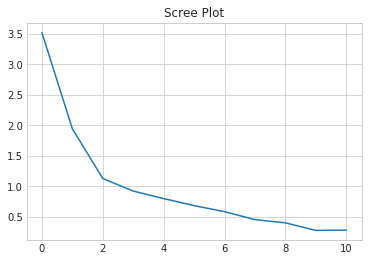

The percentage of total variance in the dataset explained 
 [  4.43335090e-01   2.20479139e-01   1.21133593e-01   6.77855314e-02
   4.93128110e-02   3.72118645e-02   2.43809243e-02   1.83516382e-02
   9.87989250e-03   8.12951604e-03   1.46760078e-33]


In [22]:
#PCA Analysis
# Build the correlation mtarix
correlation_matrix = X.corr()

#Calculate the eigenvectores & eigenvalues
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)
sklearn_pca = PCA(n_components=len(X.columns))
Y_sklearn = sklearn_pca.fit_transform(correlation_matrix)

#Plot the scree plot for visual analysis of the PCA features
plt.title('Scree Plot')
plt.plot(eig_vals)
plt.show()

#For additional aid, print the total variance explained by each of the eigenvalues
print('The percentage of total variance in the dataset explained \n', sklearn_pca.explained_variance_ratio_)

From the scree plot and the percentage of total variance explained, six features explain 93.8% of the variance. Hence the number of features initially tested are between five and six. In an initial test on a logistic regression model, if the number of features is reduced from 6 to 5, the overall accuracy of the model (on the whole dataset) is reduced 1%. Any chang in the number of features out of this set, significantly reduces the accuracy of the model.

Hence, six features are used when the recursive features elimination is run to determine the final set of features.

In [23]:
#From the scree plot, the number of features that will maximize the explanation of the variance in the dataset is:
num_features=6

Although the PCA features cannot be used due to the constraints established by the Company regarding the nature of the features, PCA features have been built to test the number of features in a basic, not tunned logistic regression model.

In [120]:
#Build PCA features
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

# Create a PCA object from Scree plot the number of components is 6
pca = decomposition.PCA(n_components=num_features)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

# Create a new dataframe with the new features
XPCA = pd.DataFrame(X_std_pca)

# Create a PCA object from Scree plot the number of components is 5
pca = decomposition.PCA(n_components=num_features-1)

# Fit the PCA and transform the data
X_std_pca_five = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca_five.shape

# Create a new dataframe with the new features
XPCAfive = pd.DataFrame(X_std_pca_five)

#Calculate percentage of variance from using five to six features

print('%of variance due to the number of features (%):', (cross_val_score(LogisticRegression(),XPCA,Y,cv=kf).mean()/
                                                      cross_val_score(LogisticRegression(),XPCAfive,Y,cv=kf).mean()-1)*100
      )

%of variance due to the number of features (%): 0.739758531649


To select the features, Feature Importance using Random Forest is used:

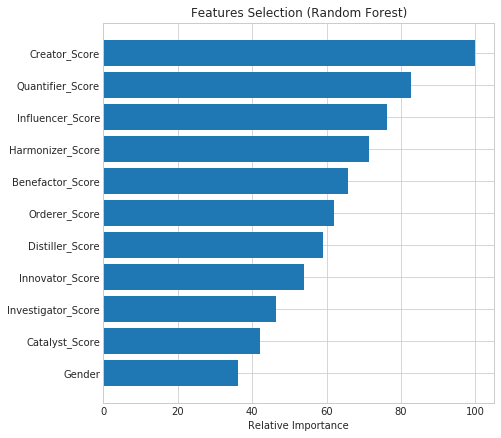

In [25]:
#Calculate Feature Importance using Random Forest
#Start and fit the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, Y)

#Define feature importance
feature_importance = rf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot the relative importance of each feature
plt.figure(figsize=(7, 7))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Features Selection (Random Forest)')
plt.show()

From the Random Forest features importance analysis gender, investigator and benefactor are the ones that are the less meaningful features.
Results are aligned with the exploratory analysis done in terms of correlations in which the investigator was correlated with the quantifier and distiller and the harmonizer with the benefactor.

To check the estability of the feature selection the same analysis is carried out suing kbest:

In [26]:
#Feature Selection using KBest
#Scores for the most relevant features start with the one that has more explanatory power
# Initialize and fit the model for features extraction
test = SelectKBest()
fit = test.fit(X, Y)

#Identify features with highest score from a predictive perspective
#Create dataframe with the features ordered by their explanatory power
features_names = X.columns
Bestfeatures = pd.DataFrame(fit.scores_, index = features_names)
Bestfeatures.columns = ['Best Features']
Bestfeatures.sort_values(by=['Best Features'], ascending=False)

,Best Features
Quantifier_Score,42.330374
Gender,42.013992
Harmonizer_Score,29.456314
Distiller_Score,22.913727
Benefactor_Score,13.268440
Creator_Score,11.889448
Orderer_Score,3.563336
Investigator_Score,1.623821
Catalyst_Score,0.315900
Influencer_Score,0.166220


In this case, results are different from the Random Forest relative importance analysis. In this case the explanatory power of gender is higher being in second place. This reinforces the correlation analysis previously done, in which gender did not present a high correlation with any of the other features.

Investigator appears as the fourth worst after innovator, influencer and catalyst. This is aligned with the exploratory analysis previously done regarding the correlation between features. Quantifier appears in the first position, harmonizer in the third.

Recursive Feature Elimination is carried out considering the maximum number of features given by the PCA.

In [27]:
# Features selection with Recursive Feature Elimination RFE model
#Set up the max number of features as indicated by PCA Analysis: number of features = 6
n_features = num_features

#Initialize the model and fit
lr = LogisticRegression()
rfe = RFE(lr,n_features)
fit = rfe.fit(X,Y)

# Summarize the features selection. Based on the number of features from the PCA analysis
#show all the features selected (true) and left out (false)
result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),columns=['Features','Ranking','Support'] )
result_RFE.sort_values('Ranking')

,Features,Ranking,Support
0,Gender,1,True
3,Influencer_Score,1,True
5,Harmonizer_Score,1,True
7,Quantifier_Score,1,True
8,Distiller_Score,1,True
10,Creator_Score,1,True
6,Investigator_Score,2,False
4,Benefactor_Score,3,False
2,Orderer_Score,4,False
9,Innovator_Score,5,False


In the RFE analysis and taking into consideration the number of features that are meaningful given by PCA, it appears that the ones that had a high correlation between them should not be considered. This is aligned with the exploratory analysis and with the relative importance analysis with Random Forest. Hence, this will be the set of features chosen to model the classifier.

The sets of features from each of the analysis is displayed below for comparison purposes. As it can be seen all of them include the same features in different order:

In [71]:
#Features seleced using each of the methodologies
#Feature Selection using Random Forest
X_randomforest = X[['Gender', 'Catalyst_Score', 'Orderer_Score', 'Influencer_Score',
       'Benefactor_Score', 'Harmonizer_Score', 'Investigator_Score',
       'Quantifier_Score', 'Distiller_Score', 'Innovator_Score',
       'Creator_Score']]

#Feature Selection using KBest
X_kbest = X[['Gender', 'Orderer_Score',
       'Benefactor_Score', 'Harmonizer_Score', 'Investigator_Score',
       'Quantifier_Score', 'Distiller_Score',
       'Creator_Score']]

#Feature Selection using RFE & PCA
X_rfe = X[['Gender','Influencer_Score',
        'Harmonizer_Score','Quantifier_Score', 
        'Distiller_Score', 'Creator_Score']]

From a features selection analysis standpoint, the PCA analysis reveals that 6 features are enough to explain the variance of the dataset. An importance features selection, explanatory power selection and RFE analysis have been carried out. The feature importance and the RFE results have aligned with the correlation shown in first instance between the features.

The features that have been selected are the six (from the PCA analysis) given by the RFE analysis. These features are:

 - Gender
 - Influencer
 - Harmonizer
 - Quantifier
 - Distiller
 - Creator

From the initial set of wow proposed to the company in the initial survey and considering the given constraints, only 5 are required added to Gender that was not initially considered due to legal reasons. Further analysis of the regulation in place showed that the Gender can be asked in a survey therefore the variable is included.

### Model Selection ###

The dataset has been split 70/30 train test and several models have been tuned in the training set and run on the test set calculating its accuracy using cross validation. The purpose of this is to train and test the binary classification models avoiding overfitting.

All models' hyperparameters were tuned while trained in the training set. As a result, the confusion matrix, type 1 and 2 errors and the classification report have been obtained as part of the model selection.

As the purpose of the analysis is to predict accurately if a new candidate will be a better fit for each of the categories, accuracy and types I & II errors have been considered.

The models to be tested for the lowest misclassification errors and best accuracy are:

  - Logistic Regression
  - Naïve - Bayes (Bernoulli)
  - KNeighbors Classifier
  - Random Forest
  - Decision Tree
  - Support Vector Machine
  - Gradient Boosting Classifier

Both classes (business and corporate) represented by 0 and 1 are balanced and the misclassification is equally important in all cases. There is no "negative or positive" case as a candidate that is falsely predicted to perform better in a corporate has the same effect as a candidate that is falsely predicted to perform better in a business role.

The null accuracy is initially calculated to check that the sample us balanced and the prediction of a "dumb" model for comparative purposes as it must be the minimum accuracy that a model should achieve.

_As both misclassiffications in the corporate and in the business area have the same cost, the overall accuracy will be used as the main score in the model selection process_

_Further inspection of the false "positives" and "negatives" will be done only when the overall accuracy is the similar between models_

_The time required to fit the model and run the cross validation using five folds will be used to indicate the computational effort of each model_

In [72]:
#Split the data into training and testing datasets. Split: 70/30; train/test
X_train, X_test, y_train, y_test = train_test_split(X_rfe,Y, test_size=0.3, random_state=111)

#Initialize the cross validation generator, N splits = 5
kf = KFold(5)

In [73]:
# Calculate null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.5157232704402516

The null accuracy (similar to the one obtained by a "random monkey") due to resampling will always predict 51.6 % of the times 0 (business). This will be used as the minimum that one of the models should achieve

#### Logistic Regression ####

The first model to be run is the Logistic Regression model. The following hyperparameters of the model have been tuned using searchgridCV and the overall accuracy as the selection strategy:

  - Parameter "C" will be tuned in the training set. Lower values of C parameter will show a higher regularization.
  - The penalty system has been tuned considering both l1 and l2 options.

The model is initialized and several values are tested. Lower values of parameter "C" will give a stronger regularization of the model.

In [74]:
# Initialize and fit the model.
log_reg = LogisticRegression()

#Tune parameters
#C parameter
c_param = [0.01,0.1,0.5,1]

#Tune the type of penalty used between l1 and l2
penalty_type = ['l1','l2']
parameters = {'C': c_param, 'penalty': penalty_type}

#Fit parameters
log_reg_tuned = GridSearchCV(log_reg, param_grid=parameters, cv=kf)

#Fit the tunned classifier in the traiing space
log_reg_tuned.fit(X_train, y_train)

#Print the best parameters
print(log_reg_tuned.best_params_)    

{'C': 0.5, 'penalty': 'l2'}


The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [75]:
#Start the timer as a measure of the computing effort
start_time = time.time()

#Fit the model on the test set
log_reg_tuned.fit(X_test, y_test)
pred_test_y = log_reg_tuned.predict(X_test)

In [76]:
#Evaluate model (test set)

#Cross validate the accuracy of the predictions
accuracy_log_reg_tuned = cross_val_score(log_reg_tuned,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names =  ['0.0', '1.0']

#Build the confusion matrix
confusion = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']


#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(confusion)
print((
    'Logistic Regression accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(accuracy_log_reg_tuned,test_tI_errors, test_tII_errors))

--- 1.7867131233215332 seconds ---
             precision    recall  f1-score   support

        0.0       0.70      0.72      0.71        82
        1.0       0.69      0.68      0.68        77

avg / total       0.70      0.70      0.70       159

[[59 23]
 [25 52]]
Logistic Regression accuracy: 0.6413306451612903
Percent Type I errors: 0.14465408805031446
Percent Type II errors: 0.15723270440251572




The overall accuracy of the Logistic Regression model is 64.1%. The obtained result is lower than the 2/3 requested by the company. Although the classification threshold can be changed from 50% to a lower number, other alternatives to the Logistic Regression model will be investigated. As a starting point, the overall acuracy is 24.5 % higher than the one obtanied by a "random monkey".

Delving into the results, the precision of the model is approx. the same for both classes although the recall (completeness) of the model is lower for class 1. F1 score shows that the balance between precision and recall is more or less balanced around 70%.

From the confusion matrix, false positives and negatives are equally balanced scoring between 14.5% and 15.7% respectively. 
The computational effort is low so if we are able to maintain the computational effort (1.78 s) improving the overall accuracy we could have a potential candidate to ove into production. 

#### Naive Bayes ####

From the Naïve Bayes models the Bernoulli algorithm has been implemented because Bernoulli model can be trained using less data and be less prone to overfitting. The hyperparameter to be tuned is "alpha".

In [77]:
# Initialize and fit the model.
naive_bayes = BernoulliNB()

#Tune hyperparameters
#Create range of values to fit parameters

alpha = [0.01,0.1,0.5,1]
parameters = {'alpha': alpha}

#Fit parameters using gridsearch
naive_bayes_tuned = GridSearchCV(naive_bayes, param_grid=parameters, cv=kf)

#Fit the tunned classifier in the traiing space
naive_bayes_tuned.fit(X_train, y_train)

#Print the best hyperparameters set
print(naive_bayes_tuned.best_params_) 

{'alpha': 0.01}


The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [78]:
#Start the timer as a measure of the computing effort
start_time = time.time()

# Predict on the test data set
#Fit the model with the new hyperparameters
naive_bayes_tuned.fit(X_test, y_test)

# Predict on training set
pred_test_y = naive_bayes_tuned.predict(X_test)

In [79]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_naive_bayes_tuned = cross_val_score(naive_bayes_tuned,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0.0', '1.0']

#Build the confusion matrix
confusion = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(confusion)
print((
    'Naive Bayes accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(accuracy_naive_bayes_tuned,test_tI_errors, test_tII_errors))

--- 1.4483745098114014 seconds ---
             precision    recall  f1-score   support

        0.0       0.68      0.73      0.71        82
        1.0       0.69      0.64      0.66        77

avg / total       0.69      0.69      0.68       159

[[60 22]
 [28 49]]
Naive Bayes accuracy: 0.6282258064516129
Percent Type I errors: 0.13836477987421383
Percent Type II errors: 0.1761006289308176




The Naïve-Bayes model scores an overall accuracy of 62.8 %, lower than the Logistic Regression model and lower than the threshold of 2/3 impossed by the company. From a computational effort standpoint, the time required is very similar to the Logistic Regression model is lower (1.44 s) so it is a better candidate for production.

In this case, precision is again very similar for both classes although recall is lower for class tagged as 1. The model is performing worse than the Logistic Regression as both type I and II errors are higher and are between 13.8%-17.6%.

As the minimum threshod set by the company has not been achieved, further models will be tested:

#### KNN ####

A Kneighbors model has been implemented and tuned on the train set. The parameters tuned are:

  - Number of neighbors which will determine the number of points used to classify into each of the categories the datapoints
  - Two weighting systems to be tested: uniform and distance.

_The number of neighbors when tuning the model has been capped to 13, the highest number under 10% of the datapoints in the test set equating to 15 to reduce overfitting._

In this case, overfitting will exist as the number of datapoints 159 in the test set is small (and in the whole dataset) being a model that has a bad performance with small datasets.

In [104]:
# Initialize and fit the model
KNN = KNeighborsClassifier()

#Create range of values to fit parameters
neighbors = [3,5,7,9,11,13]
weight_sys = ['distance','uniform']
parameters = {'n_neighbors': neighbors, 'weights': weight_sys}

#Fit parameters using gridsearch
clf = GridSearchCV(KNN, param_grid=parameters, cv=kf)

#Fit the tunned model on the training set
clf.fit(X_train, y_train)

#Print the best hyperparameters set
print("Best Hyper Parameters:", clf.best_params_)

Best Hyper Parameters: {'n_neighbors': 3, 'weights': 'distance'}


The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [105]:
#Start the timer as a measure of the computing effort
start_time = time.time()

#Initialize the model on test dataset
clf.fit(X_test, y_test)

# Predict on test dataset
pred_test_y = clf.predict(X_test)

In [106]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_clf = cross_val_score(clf,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0', '1']

#Build the confusion matrix
confusion = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(confusion)
print((
    'KNN accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(accuracy_clf,test_tI_errors, test_tII_errors))

--- 2.377383232116699 seconds ---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        82
          1       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       159

[[82  0]
 [ 0 77]]
KNN accuracy: 0.6600806451612903
Percent Type I errors: 0.0
Percent Type II errors: 0.0




The overall accuracy of the kneighbors model is 66 %. In this case, the KNieghbors model has a better performance as a binary classifier and is the first model that achieves an overall accuracy equal to the threshold set by the company. From a computational effort standpoint, this model presentes a higher computational effort (2.37 s), roughly 64.6 % higher than the computational effort required by the Naïve-Bayes Classifier.

The model presents overfitting as expected (type I and II erros are zero being precision and recall equal to 1) due to the small number of datapoints in the dataset. For this model to be more accurate and reduce overfitting, bigger datasets are required. Although overall accuracy has significantly improved, further models will be tested:

#### Support Vector Classifier ###

A support vector classifier has been set up and tuned on the training data and run on the test set. The hyperparameters that have been tuned are:

  - C parameter, acting on the margin hyperplane having a bigger margin when C is smaller. (The value of C will tell the SVM how much misclassification is to be avoided).
  - The type of kernel, chosen between linear and rbf.

In  this case as in the case of the KNieghbors classifier, some overfitting is expected and not the best performance due to the size of the dataset, which is too small for this type of models.

In [107]:
# Initialize and fit the model
svc = SVC()

#Create range of values to fit parameters
c_param = np.arange(20)+1
kernel_type =  ['linear','rbf']
parameters = {'C': c_param, 'kernel': kernel_type}

#Fit parameters using gridsearch
svc_parameters_tune = GridSearchCV(svc, param_grid=parameters, cv=kf)

#Fit the model on the training set
svc_parameters_tune.fit(X_train, y_train)

#Print the best hyperparameters set
print("Best Hyper Parameters:", svc_parameters_tune.best_params_)

Best Hyper Parameters: {'C': 2, 'kernel': 'rbf'}


The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [108]:
#Start the timer as a measure of the computing effort
start_time = time.time()

#Initialize the model on test dataset
svc_parameters_tune.fit(X_test, y_test)

# Predict on test dataset

pred_test_y = svc_parameters_tune.predict(X_test)

In [109]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_svc_parameters_tune = cross_val_score(svc_parameters_tune,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0.0', '1.0']

#Build the confusion matrix
cnf = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(cnf)
print((
    'SVC accuracy:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(accuracy_svc_parameters_tune,test_tI_errors, test_tII_errors))

--- 10.85040831565857 seconds ---
             precision    recall  f1-score   support

        0.0       0.82      0.91      0.87        82
        1.0       0.90      0.79      0.84        77

avg / total       0.86      0.86      0.85       159

[[75  7]
 [16 61]]
SVC accuracy:0.6788306451612903
Percent Type I errors: 0.0440251572327044
Percent Type II errors: 0.10062893081761007




The overall accuracy is 67.8 %, which very similar to the one obtained by the Kneighbors classifier. In this case the computational effort is significantly higher being 4.5 times higher than the one required by the KNiehgbor classifier. This model presents a better perfomance in terms of overfitting and also in terms of the type I and II error tht equate to 4.4& and 10.1% approx.

The accuracy is still low considering the requirements of the RFC and the computational effort is high if compared to the previous classifiers that achieve similar accuracy resuults. Another model will be tested:

#### Decision Tree ####

A Decision Tree model has been run and tuned in the train set. The parameter tuned is the leaf nodes considering the range of nodes to grow the tree that includes the same depth used in the random forest model.

In [43]:
# Initialize and fit the model
dtc = DecisionTreeClassifier()

#Tune hyperparameters
#Create range of values to fit parameters
max_leaf_nodes_options = [5, 10, 15, 20]
param_max_leaf_nodes = {'max_leaf_nodes': max_leaf_nodes_options}

#Tune parameters using gridsearch
max_leaf_nodes = GridSearchCV(dtc, param_grid=param_max_leaf_nodes, cv=kf)

#Fit the classifier in the traiing space
max_leaf_nodes.fit(X_train, y_train)

#The best hyperparameters set
print("Best Hyper Parameters:", max_leaf_nodes.best_params_)

Best Hyper Parameters: {'max_leaf_nodes': 15}


The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [44]:
#Start the timer as a measure of the computing effort
start_time = time.time()

# Predict on the test data set
#Fit the model with the new hyperparameters
max_leaf_nodes.fit(X_test, y_test)

# Predict on test set
pred_test_y = max_leaf_nodes.predict(X_test)

In [45]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_dtc = cross_val_score(max_leaf_nodes,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0.0', '1.0']

#Build the confusion matrix
cnf = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(cnf)
print((
    'Decision Tree accuracy:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(accuracy_dtc,test_tI_errors, test_tII_errors))

--- 0.3048522472381592 seconds ---
             precision    recall  f1-score   support

        0.0       0.90      0.90      0.90        82
        1.0       0.90      0.90      0.90        77

avg / total       0.90      0.90      0.90       159

[[74  8]
 [ 8 69]]
Decision Tree accuracy:0.6796370967741936
Percent Type I errors: 0.050314465408805034
Percent Type II errors: 0.050314465408805034


The accuracy of the decision tree (67.9 %) is nearly equal to the one obtained by the Support Vector Classifier. In this case, the overall accuracy seems within the reasonable values that a decision tree obtaines in similar circumstances. Error type I and II are smaller than in the previous models that did not present overfitting equating to 5 % in both cases.

In this case, the computational effort to achieve a similar overall accuracy than previous models is significantly lower, being the first classifier that requires less than 1 s. Compared to the Suport Vector Classifier, the Decision Tree requires 2.8 % of the computational effort used by the former.

Hence, comparing the accuracy obtained by all the classifiers so far, the decision tree classifier would be the one used as for a similar accuracy a lower computational effort is required. As the overall accuracy is still low, further models will be tried:

#### Random Forest ####

The hyperparamters of the random forest model have been tuned one by one. After trying to tune them all at once, a significant increase of the overall performance of the classifier was obtained with the proposed method (one by one). The parameters to be tuned are (in the same order as the hyperparameter tuning has been performed):

  - N_estimators determining the number of trees that will be part of the algorithm.
  - Max depth determining the size of the tree.

In [46]:
#For the Random Forest hyperparameters tuning,due to computational restrictions,
#grid search will be applied to one paramter at a time on the train set
#updating the value as we move along the hyperparameters tuning
# Initialize the model and tune the hyperparameters
#Create range of values to fit parameters for the number of estimators

param_n_estim = {'n_estimators':range(1,201,10)}

#Fit parameters using gridsearch
n_estimator = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = param_n_estim, scoring='roc_auc',n_jobs=4,iid=False,
                        cv=kf)

#Fit the model
n_estimator.fit(X_train, y_train)

#The best hyper parameters set
n_estimator.grid_scores_, n_estimator.best_params_, n_estimator.best_score_

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.66103, std: 0.05191, params: {'n_estimators': 1},
  mean: 0.80421, std: 0.02276, params: {'n_estimators': 11},
  mean: 0.80092, std: 0.03370, params: {'n_estimators': 21},
  mean: 0.83040, std: 0.03829, params: {'n_estimators': 31},
  mean: 0.80880, std: 0.04509, params: {'n_estimators': 41},
  mean: 0.82411, std: 0.04056, params: {'n_estimators': 51},
  mean: 0.81952, std: 0.03803, params: {'n_estimators': 61},
  mean: 0.82628, std: 0.03976, params: {'n_estimators': 71},
  mean: 0.82705, std: 0.03953, params: {'n_estimators': 81},
  mean: 0.82047, std: 0.04634, params: {'n_estimators': 91},
  mean: 0.83128, std: 0.04319, params: {'n_estimators': 101},
  mean: 0.82119, std: 0.04889, params: {'n_estimators': 111},
  mean: 0.82682, std: 0.04663, params: {'n_estimators': 121},
  mean: 0.82669, std: 0.04724, params: {'n_estimators': 131},
  mean: 0.83038, std: 0.04600, params: {'n_estimators': 141},
  mean: 0.82818, std: 0.03794, params: {'n_estimators': 151},
  mean: 0.82730, st

In [51]:
#With the number of estimators set, determine max depth and min sample split
#Create range of values to fit parameters
param_depth = {'max_depth':range(12,20,1)}

#Tune hyperparameters with gridsearch
depth = GridSearchCV(estimator = RandomForestClassifier(n_estimators=181), 
                        param_grid = param_depth, scoring='roc_auc',n_jobs=4,iid=False, cv=kf)

#Fit the model
depth.fit(X_train, y_train)

#The best hyper parameters set
depth.grid_scores_, depth.best_params_, depth.best_score_

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82556, std: 0.04345, params: {'max_depth': 12},
  mean: 0.81989, std: 0.04531, params: {'max_depth': 13},
  mean: 0.83181, std: 0.04107, params: {'max_depth': 14},
  mean: 0.82489, std: 0.03653, params: {'max_depth': 15},
  mean: 0.82401, std: 0.04516, params: {'max_depth': 16},
  mean: 0.82346, std: 0.04755, params: {'max_depth': 17},
  mean: 0.83186, std: 0.04591, params: {'max_depth': 18},
  mean: 0.82735, std: 0.04319, params: {'max_depth': 19}],
 {'max_depth': 18},
 0.83186278224221044)

The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [54]:
#Start the timer as a measure of the computing effort
start_time = time.time()

#Fit the model using the test dataset
depth.fit(X_test, y_test)

#Predict on test dataset
pred_test_y = depth.predict(X_test)

In [55]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_depth = cross_val_score(depth,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0', '1']

#Build the confusion matrix
cnf = confusion_matrix(y_test, pred_test_y)

# Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(cnf)
print((
    'Random Forest accuracy:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(accuracy_depth,test_tI_errors, test_tII_errors))

--- 14.488963603973389 seconds ---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        82
          1       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       159

[[82  0]
 [ 0 77]]
Random Forest accuracy:0.8233356676003734
Percent Type I errors: 0.0
Percent Type II errors: 0.0


The overall accuracy of the model has significantly increase compared to the previous classifiers achieving 82.3%. This result is aligned with the type of classifier used being a reasonable accuracy for this type of classifier. 
From the classification report and the errors type I and II, the model presents overfitting due to the size fo the dataset. The increase of accuracy comes at a computational cost. Compared to the Decision Tree Classifier, the accuracy has improved by 121 % while the computational effort has also increased significantly (from less than 1s to 14.5s) reaching similar values to the Support Vector Calssifier.
Due to the requirement given, this is the first classifier that performs better than the threshold set by the company. Further testing will be done in another model to see if the computation effort can be reduced, maintaining or improving the overall accuracy.

#### Gradient Boosting ####

The gradient boosting model has been trained and parameters tuned. The parameters that have been tuned are:
 - The number of estimators, giving the number of weak trees that the ensemble model would be using
 - The maximum depth of each tree giving the number of nodes in each of the trees.

In [57]:
#For the Gradient Boosting hyperparameters tuning
#grid search will be applied to one paramter at a time on the train set
#updating the value as we move along the hyperparameters tuning
# Initialize the model and tune the hyperparameters
#Create range of values to fit parameters for the number of estimators
parameters_basic_gdc = {'n_estimators':range(80,200,10),'max_depth':range(10,20,2), 'min_samples_split':range(2,10,2)}

#Fit parameters using gridsearch
basic_gdc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                                           max_features='sqrt', 
                                                                           subsample=0.8, 
                                                                           random_state=10), 
param_grid = parameters_basic_gdc, scoring='roc_auc',n_jobs=-1,iid=False, cv=kf)

#Fit the model
basic_gdc.fit(X_train, y_train)

#Print the hyperparameters set
basic_gdc.grid_scores_, basic_gdc.best_params_, basic_gdc.best_score_

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82998, std: 0.03713, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 80},
  mean: 0.82924, std: 0.03944, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 90},
  mean: 0.82985, std: 0.04011, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100},
  mean: 0.83059, std: 0.03987, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 110},
  mean: 0.83236, std: 0.03902, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 120},
  mean: 0.83416, std: 0.04060, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 130},
  mean: 0.83342, std: 0.04058, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 140},
  mean: 0.83357, std: 0.04049, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150},
  mean: 0.83342, std: 0.04025, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 160},
  mean: 0.83342, std: 0.04025, params: {'max_depth': 10, 'min_samples_split

In [58]:
#Re run the min_sample split with the min_sample leaf

parameters_tuning_gdc = {'min_samples_split':range(2,11,1),'min_samples_leaf':range(1,71,10)}


tuning_gdc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=190,
                                                               max_depth=16,
                                                               min_samples_split=4,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10), 
param_grid = parameters_tuning_gdc, scoring='roc_auc',n_jobs=4,iid=False, cv=kf)

#Fit the model
tuning_gdc.fit(X_train, y_train)

#Print the hyperparameters set
tuning_gdc.grid_scores_, tuning_gdc.best_params_, tuning_gdc.best_score_

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83567, std: 0.04408, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.83919, std: 0.03744, params: {'min_samples_leaf': 1, 'min_samples_split': 3},
  mean: 0.83906, std: 0.04068, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.83611, std: 0.03789, params: {'min_samples_leaf': 1, 'min_samples_split': 5},
  mean: 0.82229, std: 0.04477, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.83259, std: 0.04265, params: {'min_samples_leaf': 1, 'min_samples_split': 7},
  mean: 0.82169, std: 0.03557, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.83576, std: 0.04359, params: {'min_samples_leaf': 1, 'min_samples_split': 9},
  mean: 0.82304, std: 0.02740, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.77412, std: 0.03534, params: {'min_samples_leaf': 11, 'min_samples_split': 2},
  mean: 0.77412, std: 0.03534, params: {'min_samples_leaf': 11, 'min_samples_split': 3},
  mean: 0.77412, std: 0.03534

In [59]:
#With the number of estimators min_sammples_leaf and min sample split, tune the max_features
#Create range of values to fit parameters
param_max_features = {'max_features':range(1,6,1)}

#Tune hyperparameters with gridsearch
max_features_gbc= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=101,
                                                               max_depth=13,
                                                               min_samples_split=3,
                                                               min_samples_leaf = 1,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
param_grid = param_max_features, scoring='roc_auc',n_jobs=4,iid=False, cv=kf)


#Fit the model
max_features_gbc.fit(X_train, y_train)

#The best hyper parameters set
max_features_gbc.grid_scores_, max_features_gbc.best_params_, max_features_gbc.best_score_

/home/borjaregueral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82305, std: 0.03784, params: {'max_features': 1},
  mean: 0.83314, std: 0.03937, params: {'max_features': 2},
  mean: 0.83252, std: 0.03241, params: {'max_features': 3},
  mean: 0.83536, std: 0.04158, params: {'max_features': 4},
  mean: 0.83783, std: 0.03905, params: {'max_features': 5}],
 {'max_features': 5},
 0.83782937165911964)

The tuned model is fit and run on the test set and the timer is started to check the computational effort:

In [60]:
#Start the timer as a measure of the computing effort
start_time = time.time()

# Predict on the test data set
#Fit the model with the new hyperparameters
max_features_gbc.fit(X_test, y_test)

# Predict on the test set
pred_test_y = max_features_gbc.predict(X_test)

In [61]:
#Evaluate model on the test set

#Cross validate the accuracy of the predictions
accuracy_features_gdc = cross_val_score(max_features_gbc,X_test,y_test,cv=kf).mean()

#Print the time required to fit and evaluate the model
print("--- %s seconds ---" % (time.time() - start_time))

#Define the target names to be evaluated in the classification report
target_names = ['0.0', '1.0']

#Build the confusion matrix
cnf = confusion_matrix(y_test, pred_test_y)

#Build Accuracy tables
table_test = pd.crosstab(y_test, pred_test_y, margins=True)

#Extract type 1 and 2 errors
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

#Print results: classification report, confussion matrix, accuracy and % of errors
print(classification_report(y_test, pred_test_y, target_names=target_names))
print(cnf)
print((
    'Gradient Boosting accuracy:{}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(accuracy_features_gdc,test_tI_errors, test_tII_errors))

--- 7.841979742050171 seconds ---
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        82
        1.0       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       159

[[82  0]
 [ 0 77]]
Gradient Boosting accuracy:0.8247082166199814
Percent Type I errors: 0.0
Percent Type II errors: 0.0


The Gradient Boosting Classifier achieves a similar accuracy (82.5 %) to the one obtained by the Random Forest (82.3 %). In this case, the computational power nearly halves the computational power required by the Random Forest for a similar overall accuracy. This model also presents overfitting (errors are equal to zero), most probably due to the strategy used to tune the hyperparameters of the model based on the roc_auc and the size of the dataset.

As in the case of the Random Forest Classifier accuracy is within the region of accuracy reqested by the company.

***_This is the best candidate of all models to be moved into production as it fulfills the company requirements in terms of accuracy and requires half the computational effort required by the Random Forest Classifier._***

### Conclusion ###

The purpose of this project was to be able to predict the best match between candidates in two broad areas within an Oil & Gas Company based in Spain. To do it a survey was designed with 30 questions to analyze ten preferred ways of working by employees of different areas of the company.

The 30 questions were grouped into the 10 ways of working analyzing three different aspects of each way of working. The areas have been divided into two major areas: corporate or business. The former includes all support functions while the latter includes the frontline business area. A time window of one month or receiving more than 90% of the surveys completed was given to the company, closing the survey time once one of the two thresholds was achieved. In this case, 93% of the surveys was received before the time ended.

The model required to solve the problem is a binary classification model (only two outcomes). The initial set of predictors was 11, the 10 ways of working plus gender. There has been an imbalance in gender according to the surveys that have been received with men/women 38%/62%.

An exploratory data analysis was carried out to see if there are any patterns in the data and what kind of distribution are each of the features following. From this analysis, none of the features are following a normal distribution, but nearly all (except two predictors: "benefactor_score" and the "innovator_score") have distributions that are centered towards 10. Mean and median for all the distributions are more or less the same so all of them are centered on the mean.

The predictors were analyzed and high correlation (over 50%) was found in the following cases:

  - Harmonizer_Score / Benefactor_Score
  - Investigator_Score / Quantifier_Score / Distiller_Score

PCA analysis was run to determine the number of features that are required to describe the data. In this case, six features seem to be enough to describe the data and were used for the recursive features elimination. Features importance using Random Forest and feature selection using kbest were also run.

In all cases, the same features were selected and the ones that were presenting a high correlation were excluded in all cases. The final features that have been selected are:

 - Gender
 - Influencer_score
 - Harmonizer_Score
 - Quantifier_Score
 - Distiller_Score
 - Creator_Score

Although PCA features were built the requirements of the company to use as features only a subset or set of the initial features designed makes the use of PCA features or any kind of feature engineering unfeasible. The main reasin for this is that the best features will be used to design the second version of the survey for potential candidates. 
 
The outcome variable is “Section” having two possible outcomes 0 or 1 (business or corporate).

The models used to build the binary classifier have been:

 - Logistic Regression
 - Naïve - Bayes (Bernoulli)
 - KNeighbors Classifier
 - Random Forest
 - Decision Tree
 - Support Vector Machine
 - Gradient Boosting Classifier

For the model selection process, the overall accuracy has been used as main selection strategy. As missclassification on both ways (corprate and business) have the same cost, the overall accuracy is an acceptable indicator.

In all cases, the main hyperparameters were tuned on the train set (70%) and run on the test set (30%) after the data was normalized. A classification report, the total accuracy and type I and II errors were calculated on the test set.

Computational effort, to see which classifier could be taken into rpodction has been computed consdering the time required to fit and complete the cross validation on the test set with five folds.

The Logistics Regression (64%), Naïve-Bayes (63%), KNeighbors (66%), Sopport Vector Classifier (67%) and Decision Tree (68%) Classifiers reache an accuracy close to the threshold imposssed by th company 66%.Although they all achieve similar accuracies from a computational effort standpoint, Support Vector Classifier is the one that requires more computational power (10.85s)for the a similar accuracy compared to the Decision Tree that only requires 0.30s.

The only two classifiers that present higher accuracy are Random Forest Classifier and Gradient Boosting Classifier. In both cases, the accuracy achieved by the models is of 82% approx. although the computational power required by the Gradient Boosting Classifier (7.84s) is half the one required by the Random Forest Classifier (14.48%).

Regarding misclassification errors, Kneighbors Classifier, Random Forest and Gradient Boosting have zero value which might indicate overfitting due to the small size of the dataset (159 datapoints on the test set). Clssifiers as Kneighbors and Support Vector Machine have worse performance with smaller datasets (as in this case). 

From the overall accuracy standpoint (being the strategy used for model selection due to the constraints of the project) and the computation power required, the Classifier that would be implemented in production would be the Gradient Boosting Classifier as it reaches 82% of overall accuracy with a computational power between the one required by the KNeighbor Classifier and the Suppoet Vector Classifier.